In [1]:
import pandas as pd
import ast
import csv
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
import json

In [4]:
clean_data_folder ="/Users/adamtsuchiyama/Documents/nss_capstone/cleaned_data/"

In [5]:
aretha_df = pd.read_csv(clean_data_folder + 'aretha_analysis_clean.csv')
aretha_df = aretha_df.drop(columns=['Unnamed: 0'])
aretha_df['song_title'] = 'Respect'
aretha_df.head()

,start_rnd,duration_rnd,loudness_start,rem_loudness_start,loud_start_diff,loudness_max,rem_loudness_max,loud_max_diff,pitches,rem_pitches,pitch_eucl_dist,timbre,rem_timbre,timbre_eucl_dist,song_title
0,1.1,0.2,-10.277,-10.980,-0.703,-3.296,-7.765,-4.469,"[1.0, 0.372, 0.21, 0.083, 0.179, 0.099, 0.15, ...","[0.592, 0.168, 0.202, 0.329, 1.0, 0.24, 0.119,...",1.043580,"[54.154, 81.213, 36.362, 4.029, -7.159, -13.59...","[51.401, 118.269, 31.017, -33.129, 14.272, -35...",72.449235,Respect
1,11.8,0.3,-30.230,-19.958,10.272,-3.787,-4.466,-0.679,"[0.18, 0.073, 0.055, 0.038, 0.182, 0.093, 0.10...","[1.0, 0.47, 0.22, 0.159, 0.122, 0.109, 0.075, ...",1.485826,"[48.054, 43.87, -59.926, 107.773, -19.904, -12...","[52.771, 80.377, 46.676, 2.36, -33.527, 13.814...",176.769274,Respect
2,16.9,0.2,-8.496,-11.252,-2.756,-3.743,-5.642,-1.899,"[0.651, 0.602, 1.0, 0.326, 0.095, 0.166, 0.204...","[0.357, 0.48, 0.377, 0.19, 0.355, 1.0, 0.446, ...",1.184731,"[51.667, 56.651, 52.495, 78.093, 13.981, 13.52...","[50.298, 63.888, -8.144, 50.348, -28.977, 1.07...",105.260583,Respect
3,26.5,0.4,-23.003,-16.909,6.094,-2.039,-3.838,-1.799,"[1.0, 0.159, 0.058, 0.024, 0.063, 0.059, 0.055...","[0.228, 0.442, 0.69, 0.345, 0.315, 0.319, 0.44...",1.572021,"[46.197, 57.776, 2.359, -14.944, 31.355, 61.60...","[51.455, 70.437, 31.236, -12.336, 11.77, 17.15...",98.092696,Respect
4,35.3,0.2,-22.807,-10.488,12.319,-19.153,-5.100,14.053,"[0.589, 0.572, 0.501, 0.667, 1.0, 0.483, 0.123...","[0.115, 0.175, 0.227, 0.177, 0.048, 0.059, 0.2...",1.557303,"[39.551, -5.897, -15.692, -36.998, -0.268, -25...","[52.733, 67.814, 38.196, 21.107, -10.057, -11....",121.127687,Respect


In [6]:
aretha_loud_mean = aretha_df.loud_start_diff.mean()
aretha_loud_mean

2.5900888888888898

In [7]:
aretha_max_loud_mean = aretha_df.loud_max_diff.mean()
aretha_max_loud_mean

0.26802222222222255

In [8]:
aretha_pitch_eucl_mean = aretha_df.pitch_eucl_dist.mean()
aretha_pitch_eucl_mean

1.2925069826583242

In [9]:
aretha_timbre_eucl_mean = aretha_df.timbre_eucl_dist.mean()
aretha_timbre_eucl_mean

116.00396567238457

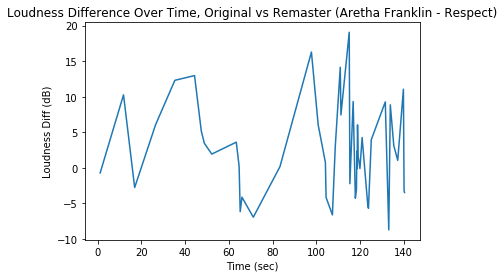

In [10]:
plt.plot(aretha_df['start_rnd'], aretha_df['loud_start_diff'])
plt.xlabel('Time (sec)')
plt.ylabel('Loudness Diff (dB)')
plt.title('Loudness Difference Over Time, Original vs Remaster (Aretha Franklin - Respect)')
plt.show()

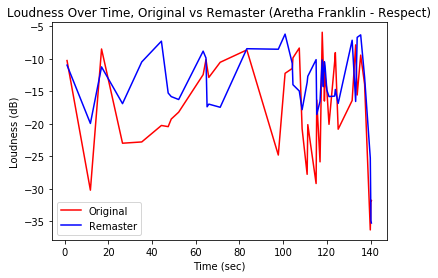

In [11]:
plt.plot(aretha_df['start_rnd'], aretha_df['loudness_start'], color='Red', label='Original')
plt.plot(aretha_df['start_rnd'], aretha_df['rem_loudness_start'], color='Blue', label='Remaster')
plt.xlabel('Time (sec)')
plt.ylabel('Loudness (dB)')
plt.title('Loudness Over Time, Original vs Remaster (Aretha Franklin - Respect)')
plt.legend()
plt.show()

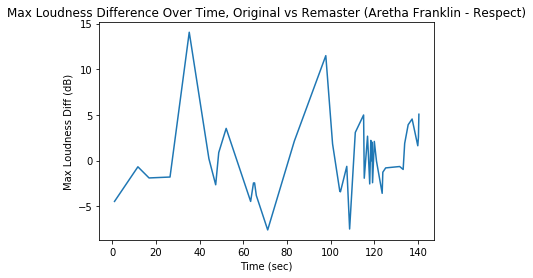

In [12]:
plt.plot(aretha_df['start_rnd'], aretha_df['loud_max_diff'])
plt.xlabel('Time (sec)')
plt.ylabel('Max Loudness Diff (dB)')
plt.title('Max Loudness Difference Over Time, Original vs Remaster (Aretha Franklin - Respect)')
plt.show()

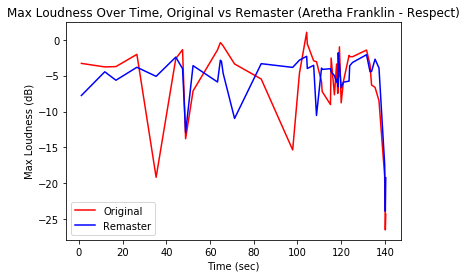

In [13]:
plt.plot(aretha_df['start_rnd'], aretha_df['loudness_max'], color='Red', label='Original')
plt.plot(aretha_df['start_rnd'], aretha_df['rem_loudness_max'], color='Blue', label='Remaster')
plt.xlabel('Time (sec)')
plt.ylabel('Max Loudness (dB)')
plt.title('Max Loudness Over Time, Original vs Remaster (Aretha Franklin - Respect)')
plt.legend()
plt.show()

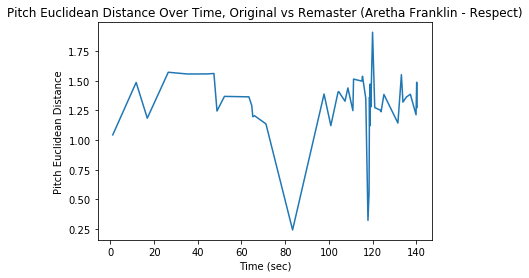

In [14]:
plt.plot(aretha_df['start_rnd'], aretha_df['pitch_eucl_dist'])
plt.xlabel('Time (sec)')
plt.ylabel('Pitch Euclidean Distance')
plt.title('Pitch Euclidean Distance Over Time, Original vs Remaster (Aretha Franklin - Respect)')
plt.show()

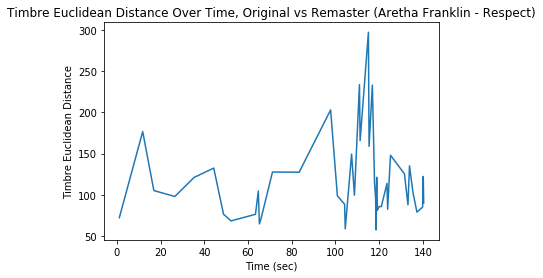

In [15]:
plt.plot(aretha_df['start_rnd'], aretha_df['timbre_eucl_dist'])
plt.xlabel('Time (sec)')
plt.ylabel('Timbre Euclidean Distance')
plt.title('Timbre Euclidean Distance Over Time, Original vs Remaster (Aretha Franklin - Respect)')
plt.show()

In [16]:
beastie_df = pd.read_csv(clean_data_folder + 'beastie_analysis_clean.csv')
beastie_df = beastie_df.drop(columns=['Unnamed: 0'])
beastie_df['song_title'] = 'Ch-Check It Out'
beastie_df.head()

,start_rnd,duration_rnd,loudness_start,rem_loudness_start,loud_start_diff,loudness_max,rem_loudness_max,loud_max_diff,pitches,rem_pitches,pitch_eucl_dist,timbre,rem_timbre,timbre_eucl_dist,song_title
0,4.7,0.2,-9.603,-18.684,-9.081,-5.213,-5.927,-0.714,"[0.269, 0.338, 0.164, 0.323, 1.0, 0.649, 0.146...","[0.44, 0.368, 0.262, 0.475, 1.0, 0.135, 0.085,...",0.729661,"[50.868, 46.806, -25.45, 19.293, 41.465, -29.5...","[49.78, 82.986, -19.983, 49.143, -5.82, -6.391...",94.075843,Ch-Check It Out
1,5.1,0.2,-23.893,-17.830,6.063,-12.952,-7.345,5.607,"[0.015, 0.045, 0.106, 1.0, 0.338, 0.036, 0.018...","[0.04, 0.191, 0.063, 1.0, 0.576, 0.104, 0.037,...",0.296091,"[44.159, 85.999, -41.947, -28.275, 53.3, 0.998...","[48.501, 81.809, -19.556, 17.344, 4.522, 17.23...",95.850761,Ch-Check It Out
2,5.3,0.1,-21.045,-22.730,-1.685,-9.557,-8.117,1.440,"[0.156, 0.191, 0.274, 0.672, 1.0, 0.035, 0.019...","[0.131, 0.409, 0.428, 0.457, 1.0, 0.859, 0.795...",1.461958,"[43.828, 38.592, -64.342, 75.954, 61.532, 8.05...","[43.617, -9.593, -17.441, 117.632, 39.718, -74...",130.563637,Ch-Check It Out
3,5.7,0.2,-23.544,-28.111,-4.567,-9.927,-8.646,1.281,"[0.007, 0.017, 0.325, 1.0, 0.176, 0.033, 0.016...","[0.075, 0.084, 0.155, 0.121, 0.259, 1.0, 0.265...",1.359755,"[47.378, 64.974, -25.624, -45.043, 20.096, -4....","[47.648, 46.791, 78.805, 12.794, 102.239, 21.7...",174.589921,Ch-Check It Out
4,5.9,0.2,-13.887,-14.354,-0.467,-9.587,-10.141,-0.554,"[0.186, 0.123, 0.302, 0.904, 0.963, 1.0, 0.785...","[0.106, 0.172, 0.425, 1.0, 0.293, 0.167, 0.131...",1.438668,"[48.16, 64.106, 106.102, 18.253, 78.969, -35.1...","[48.23, 50.646, 125.789, 13.433, 93.926, -26.1...",48.964991,Ch-Check It Out


In [17]:
beastie_loud_mean = beastie_df.loud_start_diff.mean()
beastie_loud_mean

-0.21826548672566404

In [18]:
beastie_max_loud_mean = beastie_df.loud_max_diff.mean()
beastie_max_loud_mean

1.2485132743362837

In [19]:
beastie_pitch_eucl_mean = beastie_df.pitch_eucl_dist.mean()
beastie_pitch_eucl_mean

1.2183163358446718

In [20]:
beastie_timbre_eucl_mean = beastie_df.timbre_eucl_dist.mean()
beastie_timbre_eucl_mean

128.9364212504071

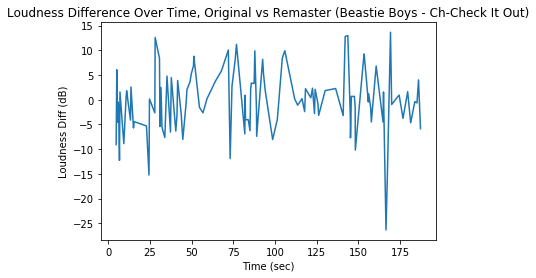

In [21]:
plt.plot(beastie_df['start_rnd'], beastie_df['loud_start_diff'])
plt.xlabel('Time (sec)')
plt.ylabel('Loudness Diff (dB)')
plt.title('Loudness Difference Over Time, Original vs Remaster (Beastie Boys - Ch-Check It Out)')
plt.show()

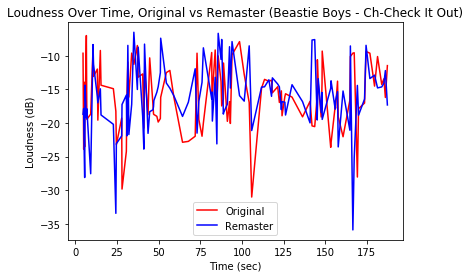

In [22]:
plt.plot(beastie_df['start_rnd'], beastie_df['loudness_start'], color='Red', label='Original')
plt.plot(beastie_df['start_rnd'], beastie_df['rem_loudness_start'], color='Blue', label='Remaster')
plt.xlabel('Time (sec)')
plt.ylabel('Loudness (dB)')
plt.title('Loudness Over Time, Original vs Remaster (Beastie Boys - Ch-Check It Out)')
plt.legend()
plt.show()

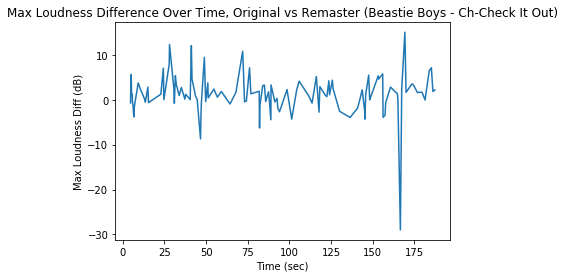

In [23]:
plt.plot(beastie_df['start_rnd'], beastie_df['loud_max_diff'])
plt.xlabel('Time (sec)')
plt.ylabel('Max Loudness Diff (dB)')
plt.title('Max Loudness Difference Over Time, Original vs Remaster (Beastie Boys - Ch-Check It Out)')
plt.show()

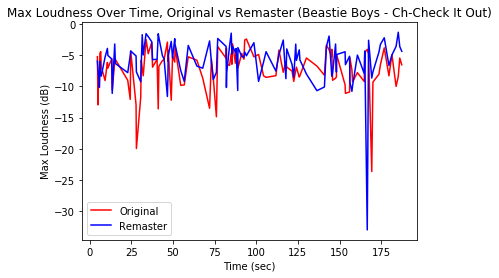

In [24]:
plt.plot(beastie_df['start_rnd'], beastie_df['loudness_max'], color='Red', label='Original')
plt.plot(beastie_df['start_rnd'], beastie_df['rem_loudness_max'], color='Blue', label='Remaster')
plt.xlabel('Time (sec)')
plt.ylabel('Max Loudness (dB)')
plt.title('Max Loudness Over Time, Original vs Remaster (Beastie Boys - Ch-Check It Out)')
plt.legend()
plt.show()

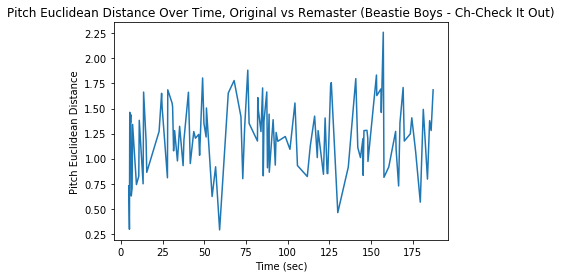

In [25]:
plt.plot(beastie_df['start_rnd'], beastie_df['pitch_eucl_dist'])
plt.xlabel('Time (sec)')
plt.ylabel('Pitch Euclidean Distance')
plt.title('Pitch Euclidean Distance Over Time, Original vs Remaster (Beastie Boys - Ch-Check It Out)')
plt.show()

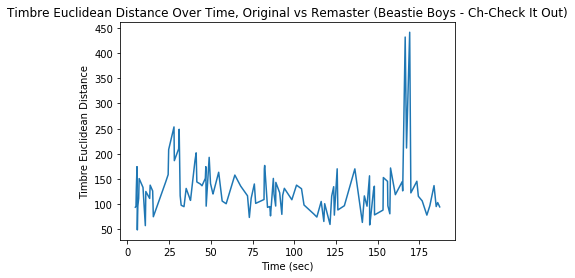

In [26]:
plt.plot(beastie_df['start_rnd'], beastie_df['timbre_eucl_dist'])
plt.xlabel('Time (sec)')
plt.ylabel('Timbre Euclidean Distance')
plt.title('Timbre Euclidean Distance Over Time, Original vs Remaster (Beastie Boys - Ch-Check It Out)')
plt.show()

In [27]:
clash_df = pd.read_csv(clean_data_folder + 'clash_analysis_clean.csv')
clash_df = clash_df.drop(columns=['Unnamed: 0'])
clash_df['song_title'] = 'London Calling'
clash_df.head()

,start_rnd,duration_rnd,loudness_start,rem_loudness_start,loud_start_diff,loudness_max,rem_loudness_max,loud_max_diff,pitches,rem_pitches,pitch_eucl_dist,timbre,rem_timbre,timbre_eucl_dist,song_title
0,3.6,0.4,-27.075,-26.513,0.562,-7.424,-7.023,0.401,"[0.476, 0.426, 0.372, 0.358, 0.49, 0.286, 0.58...","[0.72, 0.45, 0.407, 0.327, 0.447, 0.513, 0.512...",0.416953,"[45.649, 44.663, 34.028, 63.98, -2.478, 20.167...","[43.793, 13.427, 23.038, 69.46, 18.75, 48.437,...",60.466296,London Calling
1,5.0,0.4,-25.580,-22.179,3.401,-4.135,-4.266,-0.131,"[0.707, 0.55, 0.357, 0.25, 0.46, 0.367, 0.486,...","[0.621, 0.537, 0.307, 0.279, 0.466, 0.362, 0.4...",0.196698,"[47.181, 52.363, 10.145, 92.612, -0.286, 27.43...","[46.966, 29.673, 17.364, 77.558, 15.157, 30.92...",36.495311,London Calling
2,6.3,0.4,-27.547,-25.619,1.928,-6.914,-6.408,0.506,"[0.493, 0.312, 0.406, 0.267, 0.476, 0.256, 0.4...","[0.579, 0.413, 0.382, 0.306, 0.549, 0.344, 0.4...",0.251845,"[44.584, 30.559, 8.038, 107.153, 4.011, 16.738...","[42.612, 28.966, 43.831, 47.652, 9.612, 66.341...",90.240405,London Calling
3,6.7,0.4,-28.043,-25.250,2.793,-4.682,-4.937,-0.255,"[0.232, 0.069, 0.029, 0.06, 0.078, 0.091, 0.30...","[0.991, 0.771, 0.406, 0.359, 0.558, 0.573, 0.5...",1.658997,"[47.996, -31.355, -11.277, 16.425, 16.839, 23....","[44.258, 26.709, 10.965, 72.509, 28.301, 61.33...",101.698639,London Calling
4,7.6,0.5,-16.346,-28.085,-11.739,-5.047,-4.917,0.130,"[0.077, 0.056, 0.101, 0.186, 1.0, 0.084, 0.068...","[0.178, 0.057, 0.027, 0.059, 0.097, 0.103, 0.3...",1.310033,"[46.005, 37.472, -30.177, -42.219, -13.614, -9...","[47.293, -49.815, -16.94, 20.601, 21.138, 24.0...",139.248027,London Calling


In [28]:
clash_loud_mean = clash_df.loud_start_diff.mean()
clash_loud_mean

-0.031173333333333143

In [29]:
clash_max_loud_mean = clash_df.loud_max_diff.mean()
clash_max_loud_mean

-0.3161133333333333

In [30]:
clash_pitch_eucl_mean = clash_df.pitch_eucl_dist.mean()
clash_pitch_eucl_mean

1.2441022741052008

In [31]:
clash_timbre_eucl_mean = clash_df.timbre_eucl_dist.mean()
clash_timbre_eucl_mean

88.15279965155695

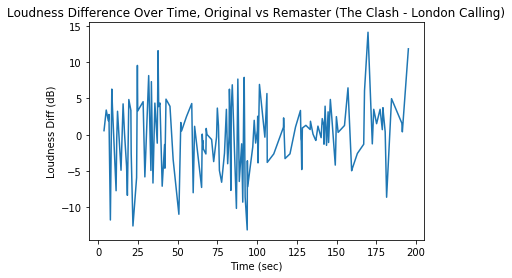

In [32]:
plt.plot(clash_df['start_rnd'], clash_df['loud_start_diff'])
plt.xlabel('Time (sec)')
plt.ylabel('Loudness Diff (dB)')
plt.title('Loudness Difference Over Time, Original vs Remaster (The Clash - London Calling)')
plt.show()

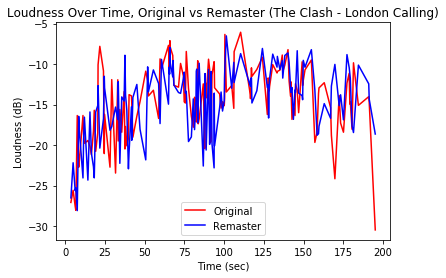

In [33]:
plt.plot(clash_df['start_rnd'], clash_df['loudness_start'], color='Red', label='Original')
plt.plot(clash_df['start_rnd'], clash_df['rem_loudness_start'], color='Blue', label='Remaster')
plt.xlabel('Time (sec)')
plt.ylabel('Loudness (dB)')
plt.title('Loudness Over Time, Original vs Remaster (The Clash - London Calling)')
plt.legend()
plt.show()

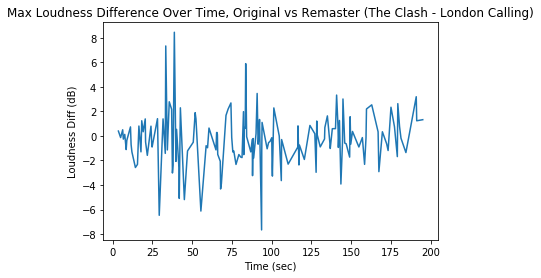

In [34]:
plt.plot(clash_df['start_rnd'], clash_df['loud_max_diff'])
plt.xlabel('Time (sec)')
plt.ylabel('Loudness Diff (dB)')
plt.title('Max Loudness Difference Over Time, Original vs Remaster (The Clash - London Calling)')
plt.show()

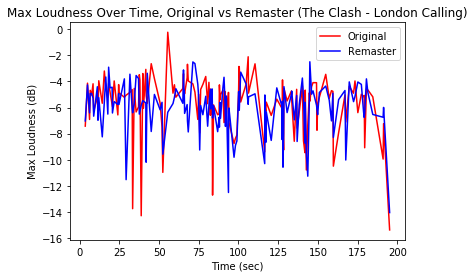

In [35]:
plt.plot(clash_df['start_rnd'], clash_df['loudness_max'], color='Red', label='Original')
plt.plot(clash_df['start_rnd'], clash_df['rem_loudness_max'], color='Blue', label='Remaster')
plt.xlabel('Time (sec)')
plt.ylabel('Max Loudness (dB)')
plt.title('Max Loudness Over Time, Original vs Remaster (The Clash - London Calling)')
plt.legend()
plt.show()

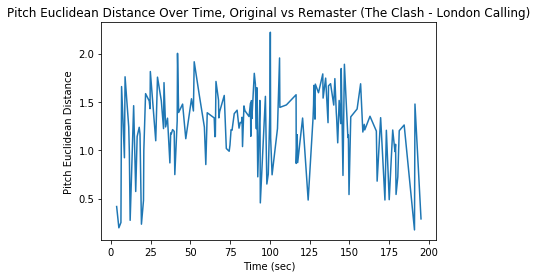

In [36]:
plt.plot(clash_df['start_rnd'], clash_df['pitch_eucl_dist'])
plt.xlabel('Time (sec)')
plt.ylabel('Pitch Euclidean Distance')
plt.title('Pitch Euclidean Distance Over Time, Original vs Remaster (The Clash - London Calling)')
plt.show()

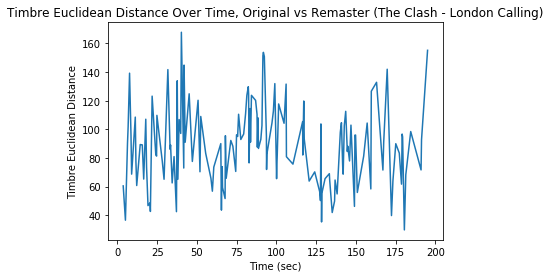

In [37]:
plt.plot(clash_df['start_rnd'], clash_df['timbre_eucl_dist'])
plt.xlabel('Time (sec)')
plt.ylabel('Timbre Euclidean Distance')
plt.title('Timbre Euclidean Distance Over Time, Original vs Remaster (The Clash - London Calling)')
plt.show()

In [38]:
euryth_df = pd.read_csv(clean_data_folder + 'euryth_analysis_clean.csv')
euryth_df = euryth_df.drop(columns=['Unnamed: 0'])
euryth_df['song_title'] = 'Sweet Dreams (Are Made of This)'
euryth_df.head()

,start_rnd,duration_rnd,loudness_start,rem_loudness_start,loud_start_diff,loudness_max,rem_loudness_max,loud_max_diff,pitches,rem_pitches,pitch_eucl_dist,timbre,rem_timbre,timbre_eucl_dist,song_title
0,1.5,0.2,-28.478,-35.243,-6.765,-11.869,-16.315,-4.446,"[0.638, 0.566, 0.605, 1.0, 0.352, 0.164, 0.173...","[1.0, 0.474, 0.256, 0.089, 0.064, 0.124, 0.134...",1.090041,"[39.56, -13.427, -51.499, 74.977, -56.132, -71...","[34.953, 9.958, -55.607, 103.132, -52.441, -42...",54.401413,Sweet Dreams (Are Made of This)
1,2.7,0.2,-35.534,-37.348,-1.814,-25.571,-23.133,2.438,"[0.07, 0.031, 0.016, 0.139, 0.023, 0.023, 0.04...","[0.364, 0.024, 0.014, 0.027, 0.02, 0.016, 0.05...",0.400694,"[29.779, -28.256, -3.057, -14.552, 11.725, 4.5...","[33.19, 1.516, -17.888, -1.11, -7.291, 19.538,...",52.874227,Sweet Dreams (Are Made of This)
2,3.9,0.3,-31.681,-34.443,-2.762,-10.893,-13.393,-2.500,"[1.0, 0.962, 0.622, 0.225, 0.115, 0.551, 0.29,...","[0.953, 1.0, 0.341, 0.211, 0.08, 0.053, 0.04, ...",1.118918,"[40.438, -14.804, -47.057, 102.343, -35.077, -...","[37.44, -40.775, -95.063, 64.828, -44.277, -87...",82.437887,Sweet Dreams (Are Made of This)
3,5.1,0.2,-30.228,-37.892,-7.664,-17.706,-19.310,-1.604,"[1.0, 0.225, 0.113, 0.072, 0.127, 0.088, 0.032...","[1.0, 0.069, 0.041, 0.394, 0.081, 0.018, 0.018...",0.424747,"[39.121, 13.814, 27.534, -0.827, -0.215, 3.37,...","[35.488, 20.4, 15.672, -28.682, 30.298, 60.238...",84.609525,Sweet Dreams (Are Made of This)
4,6.3,0.3,-27.833,-41.938,-14.105,-10.107,-16.493,-6.386,"[1.0, 0.895, 0.521, 0.327, 0.104, 0.223, 0.331...","[0.337, 0.257, 0.152, 0.113, 0.027, 0.071, 0.0...",1.284019,"[39.997, -13.995, -42.724, 104.636, -42.076, -...","[36.836, 6.878, -51.859, 57.19, -37.193, -50.7...",61.014970,Sweet Dreams (Are Made of This)


In [39]:
euryth_loud_mean = euryth_df.loud_start_diff.mean()
euryth_loud_mean

-6.3660634920634935

In [40]:
euryth_max_loud_mean = euryth_df.loud_max_diff.mean()
euryth_max_loud_mean

-5.688825396825398

In [41]:
euryth_pitch_eucl_mean = euryth_df.pitch_eucl_dist.mean()
euryth_pitch_eucl_mean

1.0871960646811385

In [42]:
euryth_timbre_eucl_mean = euryth_df.timbre_eucl_dist.mean()
euryth_timbre_eucl_mean

103.11412565583949

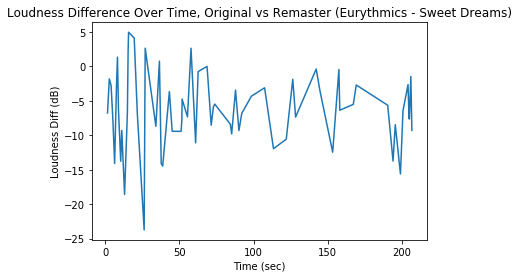

In [43]:
plt.plot(euryth_df['start_rnd'], euryth_df['loud_start_diff'])
plt.xlabel('Time (sec)')
plt.ylabel('Loudness Diff (dB)')
plt.title('Loudness Difference Over Time, Original vs Remaster (Eurythmics - Sweet Dreams)')
plt.show()

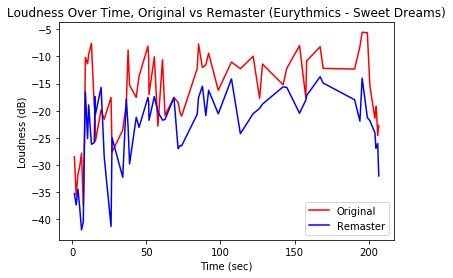

In [44]:
plt.plot(euryth_df['start_rnd'], euryth_df['loudness_start'], color='Red', label='Original')
plt.plot(euryth_df['start_rnd'], euryth_df['rem_loudness_start'], color='Blue', label='Remaster')
plt.xlabel('Time (sec)')
plt.ylabel('Loudness (dB)')
plt.title('Loudness Over Time, Original vs Remaster (Eurythmics - Sweet Dreams)')
plt.legend()
plt.show()

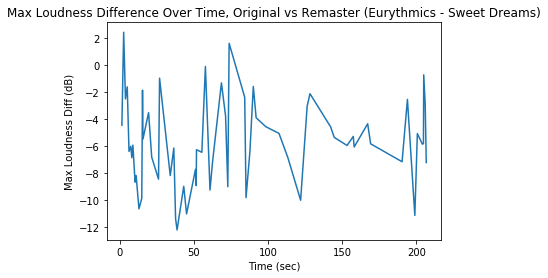

In [45]:
plt.plot(euryth_df['start_rnd'], euryth_df['loud_max_diff'])
plt.xlabel('Time (sec)')
plt.ylabel('Max Loudness Diff (dB)')
plt.title('Max Loudness Difference Over Time, Original vs Remaster (Eurythmics - Sweet Dreams)')
plt.show()

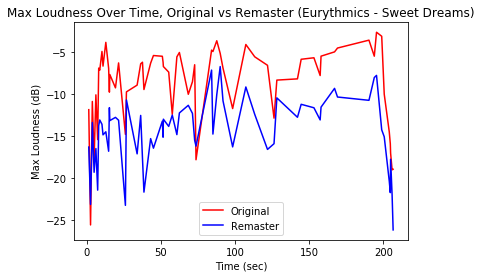

In [46]:
plt.plot(euryth_df['start_rnd'], euryth_df['loudness_max'], color='Red', label='Original')
plt.plot(euryth_df['start_rnd'], euryth_df['rem_loudness_max'], color='Blue', label='Remaster')
plt.xlabel('Time (sec)')
plt.ylabel('Max Loudness (dB)')
plt.title('Max Loudness Over Time, Original vs Remaster (Eurythmics - Sweet Dreams)')
plt.legend()
plt.show()

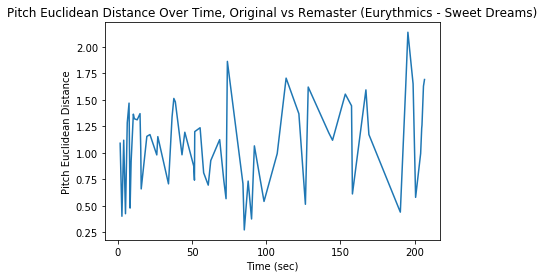

In [47]:
plt.plot(euryth_df['start_rnd'], euryth_df['pitch_eucl_dist'])
plt.xlabel('Time (sec)')
plt.ylabel('Pitch Euclidean Distance')
plt.title('Pitch Euclidean Distance Over Time, Original vs Remaster (Eurythmics - Sweet Dreams)')
plt.show()

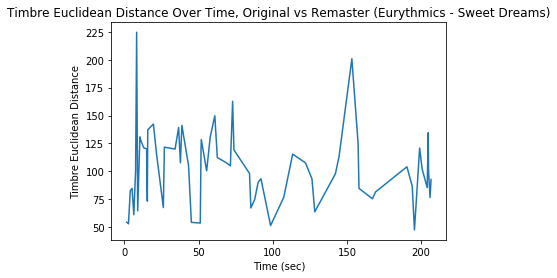

In [48]:
plt.plot(euryth_df['start_rnd'], euryth_df['timbre_eucl_dist'])
plt.xlabel('Time (sec)')
plt.ylabel('Timbre Euclidean Distance')
plt.title('Timbre Euclidean Distance Over Time, Original vs Remaster (Eurythmics - Sweet Dreams)')
plt.show()

In [49]:
ice_cube_df = pd.read_csv(clean_data_folder + 'ice_cube_analysis_clean.csv')
ice_cube_df = ice_cube_df.drop(columns=['Unnamed: 0'])
ice_cube_df['song_title'] = 'It Was A Good Day'
ice_cube_df.head()

,start_rnd,duration_rnd,loudness_start,rem_loudness_start,loud_start_diff,loudness_max,rem_loudness_max,loud_max_diff,pitches,rem_pitches,pitch_eucl_dist,timbre,rem_timbre,timbre_eucl_dist,song_title
0,0.0,0.2,-55.752,-59.821,-4.069,-53.645,-58.045,-4.400,"[0.213, 0.218, 0.432, 0.439, 0.459, 0.779, 1.0...","[0.753, 0.674, 0.395, 0.189, 0.183, 0.325, 0.2...",1.556804,"[5.279, 80.824, -94.435, -61.994, -10.438, -42...","[1.473, 164.012, -1.409, -34.308, 24.225, -39....",134.911660,It Was A Good Day
1,0.2,0.3,-57.703,-58.635,-0.932,-8.941,-24.822,-15.881,"[0.465, 1.0, 0.169, 0.087, 0.234, 0.399, 0.071...","[0.205, 0.029, 0.028, 0.02, 0.02, 0.024, 0.041...",1.581338,"[41.815, -25.103, -45.155, -27.402, 3.281, 173...","[19.147, -0.204, -20.276, -262.456, 11.385, 25...",302.368698,It Was A Good Day
2,0.5,0.1,-18.227,-39.637,-21.410,-15.995,-25.678,-9.683,"[1.0, 0.614, 0.636, 0.628, 0.508, 0.508, 0.101...","[0.419, 0.298, 0.172, 0.073, 0.087, 0.073, 0.1...",1.510156,"[43.448, 2.368, 9.896, -28.191, 10.647, -43.00...","[27.852, 25.622, -55.305, 3.881, -8.367, -113....",147.286498,It Was A Good Day
3,3.1,0.4,-24.000,-19.538,4.462,-11.396,-10.085,1.311,"[0.035, 0.075, 0.146, 0.114, 0.212, 0.726, 1.0...","[0.585, 0.581, 0.576, 0.557, 0.492, 0.531, 0.5...",2.000045,"[42.936, -15.887, -24.672, -44.586, 5.403, 20....","[44.953, 93.378, 33.591, -3.494, 36.92, 22.382...",152.519285,It Was A Good Day
4,4.2,0.2,-24.557,-18.833,5.724,-12.465,0.013,12.478,"[0.184, 0.338, 0.359, 0.186, 0.593, 0.244, 0.2...","[0.196, 0.237, 0.229, 0.124, 0.138, 0.122, 0.2...",1.128498,"[44.41, 76.734, 65.881, 2.592, 39.405, 27.489,...","[51.236, 47.3, -9.131, 39.291, 17.331, 58.845,...",111.678349,It Was A Good Day


In [50]:
ice_cube_loud_mean = ice_cube_df.loud_start_diff.mean()
ice_cube_loud_mean

2.4355909090909096

In [51]:
ice_cube_max_loud_mean = ice_cube_df.loud_max_diff.mean()
ice_cube_max_loud_mean

2.2561818181818176

In [52]:
ice_cube_pitch_eucl_mean = ice_cube_df.pitch_eucl_dist.mean()
ice_cube_pitch_eucl_mean

1.3416252191827895

In [53]:
ice_cube_timbre_eucl_mean = ice_cube_df.timbre_eucl_dist.mean()
ice_cube_timbre_eucl_mean

142.21086100831005

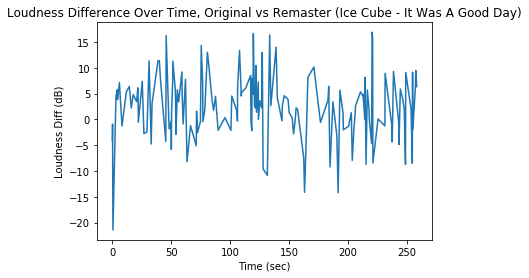

In [54]:
plt.plot(ice_cube_df['start_rnd'], ice_cube_df['loud_start_diff'])
plt.xlabel('Time (sec)')
plt.ylabel('Loudness Diff (dB)')
plt.title('Loudness Difference Over Time, Original vs Remaster (Ice Cube - It Was A Good Day)')
plt.show()

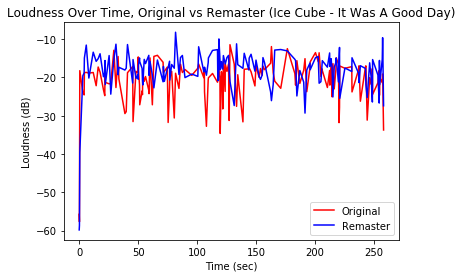

In [55]:
plt.plot(ice_cube_df['start_rnd'], ice_cube_df['loudness_start'], color='Red', label='Original')
plt.plot(ice_cube_df['start_rnd'], ice_cube_df['rem_loudness_start'], color='Blue', label='Remaster')
plt.xlabel('Time (sec)')
plt.ylabel('Loudness (dB)')
plt.title('Loudness Over Time, Original vs Remaster (Ice Cube - It Was A Good Day)')
plt.legend()
plt.show()

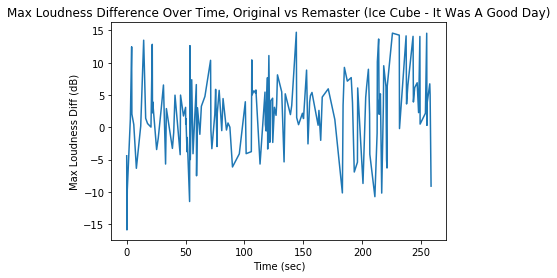

In [56]:
plt.plot(ice_cube_df['start_rnd'], ice_cube_df['loud_max_diff'])
plt.xlabel('Time (sec)')
plt.ylabel('Max Loudness Diff (dB)')
plt.title('Max Loudness Difference Over Time, Original vs Remaster (Ice Cube - It Was A Good Day)')
plt.show()

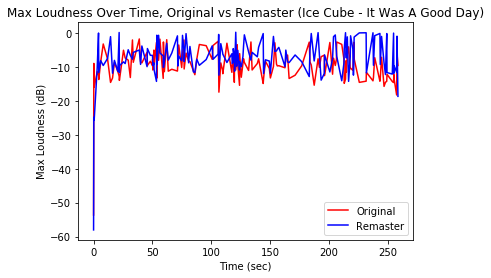

In [57]:
plt.plot(ice_cube_df['start_rnd'], ice_cube_df['loudness_max'], color='Red', label='Original')
plt.plot(ice_cube_df['start_rnd'], ice_cube_df['rem_loudness_max'], color='Blue', label='Remaster')
plt.xlabel('Time (sec)')
plt.ylabel('Max Loudness (dB)')
plt.title('Max Loudness Over Time, Original vs Remaster (Ice Cube - It Was A Good Day)')
plt.legend()
plt.show()

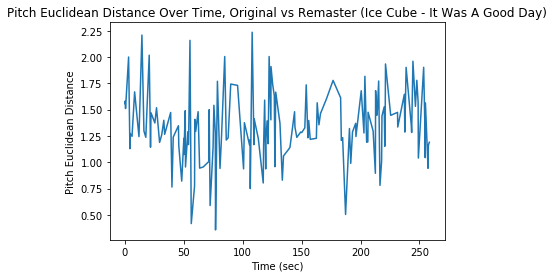

In [58]:
plt.plot(ice_cube_df['start_rnd'], ice_cube_df['pitch_eucl_dist'])
plt.xlabel('Time (sec)')
plt.ylabel('Pitch Euclidean Distance')
plt.title('Pitch Euclidean Distance Over Time, Original vs Remaster (Ice Cube - It Was A Good Day)')
plt.show()

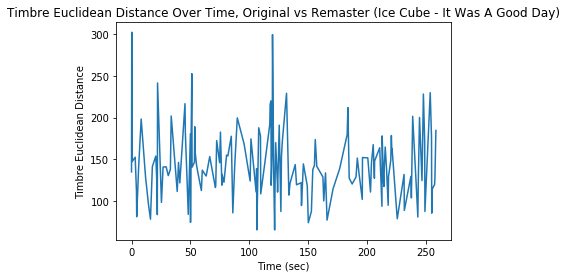

In [59]:
plt.plot(ice_cube_df['start_rnd'], ice_cube_df['timbre_eucl_dist'])
plt.xlabel('Time (sec)')
plt.ylabel('Timbre Euclidean Distance')
plt.title('Timbre Euclidean Distance Over Time, Original vs Remaster (Ice Cube - It Was A Good Day)')
plt.show()

In [60]:
interpol_df = pd.read_csv(clean_data_folder + 'interpol_analysis_clean.csv')
interpol_df = interpol_df.drop(columns=['Unnamed: 0'])
interpol_df['song_title'] = 'PDA'
interpol_df.head()

,start_rnd,duration_rnd,loudness_start,rem_loudness_start,loud_start_diff,loudness_max,rem_loudness_max,loud_max_diff,pitches,rem_pitches,pitch_eucl_dist,timbre,rem_timbre,timbre_eucl_dist,song_title
0,0.6,0.2,-19.738,-19.841,-0.103,-6.152,-6.168,-0.016,"[0.214, 0.223, 0.203, 0.4, 0.533, 0.748, 1.0, ...","[0.212, 0.219, 0.189, 0.391, 0.529, 0.692, 1.0...",0.062458,"[47.588, 96.142, -55.139, -6.409, 0.509, 19.23...","[47.465, 102.442, -54.042, -14.891, 1.439, 26....",20.220580,PDA
1,0.8,0.2,-18.340,-18.281,0.059,-8.772,-8.783,-0.011,"[0.919, 0.707, 0.461, 0.605, 0.703, 0.203, 0.1...","[0.904, 0.711, 0.461, 0.604, 0.699, 0.204, 0.1...",0.017889,"[44.045, 54.766, -125.869, -0.505, -24.424, -9...","[44.037, 53.837, -126.295, -3.954, -26.794, -9...",7.843762,PDA
2,1.0,0.2,-22.549,-22.438,0.111,-9.364,-9.208,0.156,"[1.0, 0.477, 0.263, 0.611, 0.637, 0.245, 0.168...","[1.0, 0.49, 0.28, 0.609, 0.618, 0.26, 0.177, 0...",0.070760,"[43.418, 51.025, -139.872, 11.378, -25.689, -8...","[43.568, 50.937, -137.322, 10.376, -25.853, -9...",5.615807,PDA
3,1.2,0.2,-24.394,-24.397,-0.003,-8.540,-8.441,0.099,"[0.518, 0.385, 0.319, 0.28, 0.116, 0.11, 0.434...","[0.525, 0.444, 0.331, 0.286, 0.147, 0.143, 0.4...",0.081006,"[42.288, 21.013, -140.753, 44.286, -39.24, -96...","[42.35, 21.643, -143.509, 40.482, -31.159, -75...",28.300634,PDA
4,1.4,0.2,-27.126,-26.922,0.204,-7.303,-7.438,-0.135,"[0.135, 0.25, 0.229, 0.358, 0.55, 0.504, 1.0, ...","[0.139, 0.257, 0.226, 0.348, 0.544, 0.462, 1.0...",0.050359,"[43.905, 63.822, -61.724, -47.976, 2.497, 81.1...","[43.476, 64.919, -57.647, -62.37, 2.298, 81.17...",21.436749,PDA


In [61]:
interpol_loud_mean = interpol_df.loud_start_diff.mean()
interpol_loud_mean

0.12178260869565218

In [62]:
interpol_max_loud_mean = interpol_df.loud_max_diff.mean()
interpol_max_loud_mean

0.10351449275362314

In [63]:
interpol_pitch_eucl_mean = interpol_df.pitch_eucl_dist.mean()
interpol_pitch_eucl_mean

0.07303367117150522

In [64]:
interpol_timbre_eucl_mean = interpol_df.timbre_eucl_dist.mean()
interpol_timbre_eucl_mean

7.033959763730261

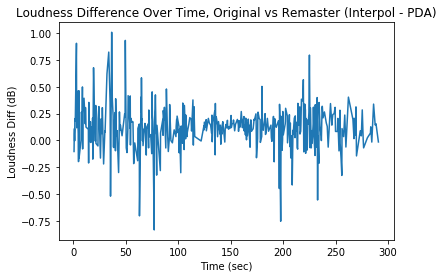

In [65]:
plt.plot(interpol_df['start_rnd'], interpol_df['loud_start_diff'])
plt.xlabel('Time (sec)')
plt.ylabel('Loudness Diff (dB)')
plt.title('Loudness Difference Over Time, Original vs Remaster (Interpol - PDA)')
plt.show()

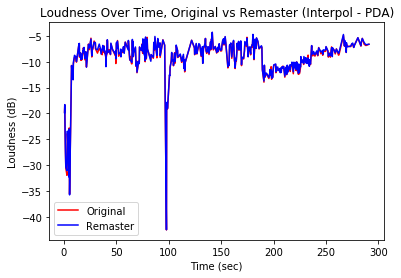

In [66]:
plt.plot(interpol_df['start_rnd'], interpol_df['loudness_start'], color='Red', label='Original')
plt.plot(interpol_df['start_rnd'], interpol_df['rem_loudness_start'], color='Blue', label='Remaster')
plt.xlabel('Time (sec)')
plt.ylabel('Loudness (dB)')
plt.title('Loudness Over Time, Original vs Remaster (Interpol - PDA)')
plt.legend()
plt.show()

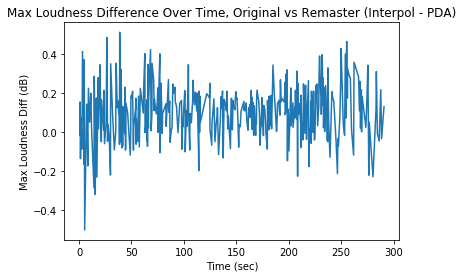

In [67]:
plt.plot(interpol_df['start_rnd'], interpol_df['loud_max_diff'])
plt.xlabel('Time (sec)')
plt.ylabel('Max Loudness Diff (dB)')
plt.title('Max Loudness Difference Over Time, Original vs Remaster (Interpol - PDA)')
plt.show()

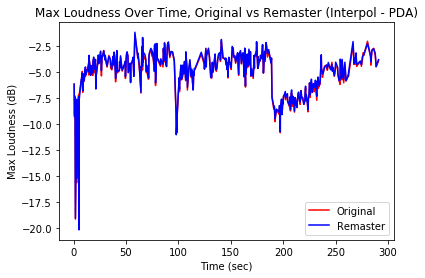

In [68]:
plt.plot(interpol_df['start_rnd'], interpol_df['loudness_max'], color='Red', label='Original')
plt.plot(interpol_df['start_rnd'], interpol_df['rem_loudness_max'], color='Blue', label='Remaster')
plt.xlabel('Time (sec)')
plt.ylabel('Max Loudness (dB)')
plt.title('Max Loudness Over Time, Original vs Remaster (Interpol - PDA)')
plt.legend()
plt.show()

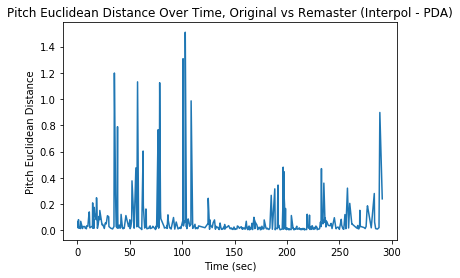

In [69]:
plt.plot(interpol_df['start_rnd'], interpol_df['pitch_eucl_dist'])
plt.xlabel('Time (sec)')
plt.ylabel('Pitch Euclidean Distance')
plt.title('Pitch Euclidean Distance Over Time, Original vs Remaster (Interpol - PDA)')
plt.show()

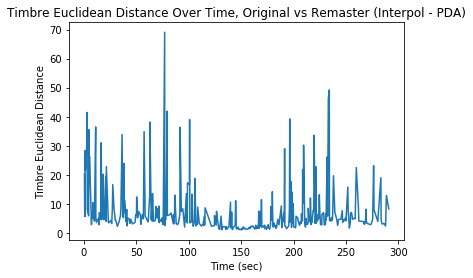

In [70]:
plt.plot(interpol_df['start_rnd'], interpol_df['timbre_eucl_dist'])
plt.xlabel('Time (sec)')
plt.ylabel('Timbre Euclidean Distance')
plt.title('Timbre Euclidean Distance Over Time, Original vs Remaster (Interpol - PDA)')
plt.show()

In [71]:
mb20_df = pd.read_csv(clean_data_folder + 'mb20_analysis_clean.csv')
mb20_df = mb20_df.drop(columns=['Unnamed: 0'])
mb20_df['song_title'] = 'Unwell'
mb20_df.head()

,start_rnd,duration_rnd,loudness_start,rem_loudness_start,loud_start_diff,loudness_max,rem_loudness_max,loud_max_diff,pitches,rem_pitches,pitch_eucl_dist,timbre,rem_timbre,timbre_eucl_dist,song_title
0,5.2,0.2,-11.775,-12.984,-1.209,-9.414,-10.130,-0.716,"[0.291, 1.0, 0.625, 0.409, 0.278, 0.197, 0.035...","[0.328, 1.0, 0.49, 0.262, 0.201, 0.033, 0.076,...",0.283618,"[49.299, 37.289, 22.494, -4.89, 7.75, -27.782,...","[48.691, 10.157, 44.399, -3.43, -2.971, -30.75...",48.669440,Unwell
1,11.1,0.2,-12.535,-15.100,-2.565,-9.141,-12.753,-3.612,"[0.347, 0.758, 0.796, 1.0, 0.563, 0.139, 0.188...","[0.166, 0.143, 0.055, 0.484, 1.0, 0.582, 0.148...",1.355873,"[48.483, 33.704, 49.344, 0.144, -9.512, -30.23...","[46.803, -26.575, 37.397, -17.814, -7.617, -43...",74.774438,Unwell
2,13.9,0.2,-9.116,-9.607,-0.491,-5.921,-3.108,2.813,"[0.147, 0.202, 0.095, 0.051, 0.756, 0.119, 0.0...","[0.379, 0.359, 0.188, 0.212, 0.662, 0.145, 0.5...",0.864421,"[52.344, 34.517, 62.029, -11.79, 38.627, -20.5...","[53.091, 10.832, 32.058, -2.611, 18.779, -61.2...",85.959014,Unwell
3,16.5,0.4,-9.963,-7.681,2.282,-5.226,-5.254,-0.028,"[0.15, 0.321, 1.0, 0.265, 0.31, 0.22, 0.221, 0...","[0.3, 0.364, 1.0, 0.475, 0.58, 0.276, 0.38, 0....",0.886970,"[52.861, 19.243, 31.592, -3.789, 11.807, -38.0...","[53.392, 22.88, 56.12, -1.568, 16.57, -28.695,...",57.951998,Unwell
4,18.0,0.4,-8.751,-8.484,0.267,-3.825,-5.957,-2.132,"[0.071, 0.322, 0.101, 0.052, 0.172, 0.245, 1.0...","[0.156, 0.595, 1.0, 0.072, 0.791, 0.089, 0.129...",1.610111,"[54.678, 56.653, 21.941, -15.337, 7.411, -27.9...","[52.888, 35.772, 50.925, -3.545, 50.624, -36.5...",64.625717,Unwell


In [72]:
mb20_loud_mean = mb20_df.loud_start_diff.mean()
mb20_loud_mean

-0.1638142857142859

In [73]:
mb20_max_loud_mean = mb20_df.loud_max_diff.mean()
mb20_max_loud_mean

-0.08261428571428575

In [74]:
mb20_pitch_eucl_mean = mb20_df.pitch_eucl_dist.mean()
mb20_pitch_eucl_mean

1.0366447157551535

In [75]:
mb20_timbre_eucl_mean = mb20_df.timbre_eucl_dist.mean()
mb20_timbre_eucl_mean

93.79667884203634

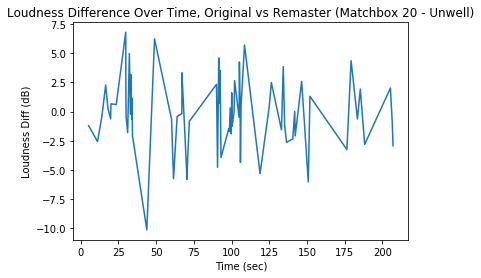

In [76]:
plt.plot(mb20_df['start_rnd'], mb20_df['loud_start_diff'])
plt.xlabel('Time (sec)')
plt.ylabel('Loudness Diff (dB)')
plt.title('Loudness Difference Over Time, Original vs Remaster (Matchbox 20 - Unwell)')
plt.show()

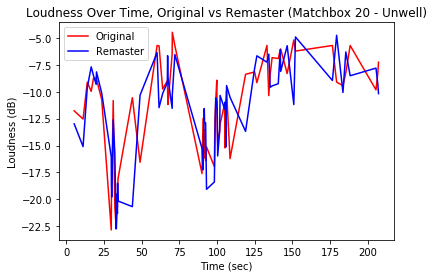

In [77]:
plt.plot(mb20_df['start_rnd'], mb20_df['loudness_start'], color='Red', label='Original')
plt.plot(mb20_df['start_rnd'], mb20_df['rem_loudness_start'], color='Blue', label='Remaster')
plt.xlabel('Time (sec)')
plt.ylabel('Loudness (dB)')
plt.title('Loudness Over Time, Original vs Remaster (Matchbox 20 - Unwell)')
plt.legend()
plt.show()

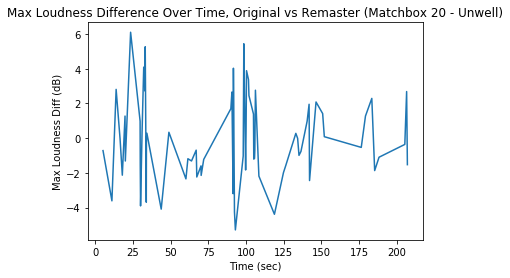

In [78]:
plt.plot(mb20_df['start_rnd'], mb20_df['loud_max_diff'])
plt.xlabel('Time (sec)')
plt.ylabel('Max Loudness Diff (dB)')
plt.title('Max Loudness Difference Over Time, Original vs Remaster (Matchbox 20 - Unwell)')
plt.show()

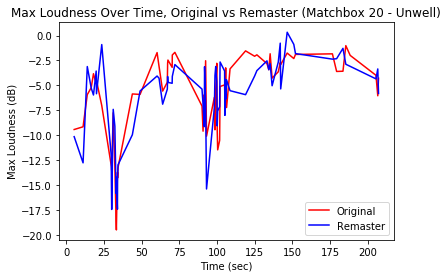

In [79]:
plt.plot(mb20_df['start_rnd'], mb20_df['loudness_max'], color='Red', label='Original')
plt.plot(mb20_df['start_rnd'], mb20_df['rem_loudness_max'], color='Blue', label='Remaster')
plt.xlabel('Time (sec)')
plt.ylabel('Max Loudness (dB)')
plt.title('Max Loudness Over Time, Original vs Remaster (Matchbox 20 - Unwell)')
plt.legend()
plt.show()

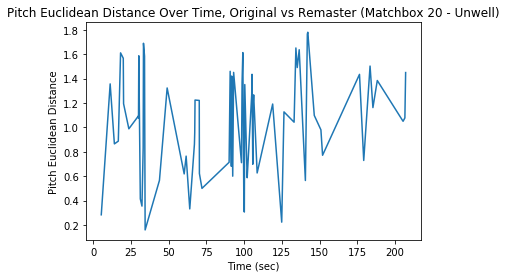

In [80]:
plt.plot(mb20_df['start_rnd'], mb20_df['pitch_eucl_dist'])
plt.xlabel('Time (sec)')
plt.ylabel('Pitch Euclidean Distance')
plt.title('Pitch Euclidean Distance Over Time, Original vs Remaster (Matchbox 20 - Unwell)')
plt.show()

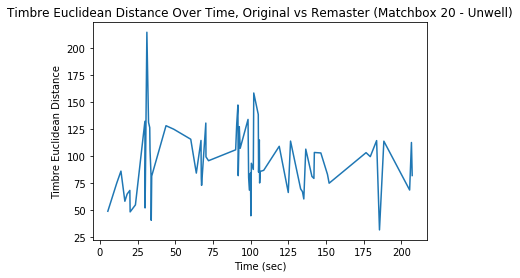

In [81]:
plt.plot(mb20_df['start_rnd'], mb20_df['timbre_eucl_dist'])
plt.xlabel('Time (sec)')
plt.ylabel('Timbre Euclidean Distance')
plt.title('Timbre Euclidean Distance Over Time, Original vs Remaster (Matchbox 20 - Unwell)')
plt.show()

In [82]:
nin_df = pd.read_csv(clean_data_folder + 'nin_analysis_clean.csv')
nin_df = nin_df.drop(columns=['Unnamed: 0'])
nin_df['song_title'] = 'Head Like A Hole'
nin_df.head()

,start_rnd,duration_rnd,loudness_start,rem_loudness_start,loud_start_diff,loudness_max,rem_loudness_max,loud_max_diff,pitches,rem_pitches,pitch_eucl_dist,timbre,rem_timbre,timbre_eucl_dist,song_title
0,0.8,0.1,-51.525,-38.071,13.454,-36.787,-28.024,8.763,"[0.284, 0.514, 0.12, 0.144, 0.215, 0.15, 0.181...","[0.495, 0.752, 1.0, 0.613, 0.479, 0.909, 0.93,...",1.582487,"[16.955, 134.723, 6.042, 66.641, 95.517, -73.0...","[26.324, 139.765, -45.937, 57.368, 105.222, -2...",107.332907,Head Like A Hole
1,0.9,0.1,-49.972,-44.228,5.744,-33.722,-23.740,9.982,"[0.56, 0.182, 0.197, 0.117, 0.169, 0.146, 0.16...","[0.319, 0.43, 0.635, 0.606, 0.48, 0.457, 0.408...",1.579764,"[20.006, 116.025, -1.34, 61.184, 76.457, -42.2...","[27.631, 163.847, 0.189, 87.129, 74.423, 19.74...",94.625265,Head Like A Hole
2,1.3,0.1,-49.790,-43.543,6.247,-33.736,-27.452,6.284,"[0.376, 0.366, 0.745, 0.289, 0.225, 0.367, 0.5...","[0.106, 0.409, 0.126, 0.141, 0.217, 0.146, 0.1...",1.211864,"[17.991, 119.4, -2.018, 82.187, 72.488, -88.05...","[25.081, 127.569, -17.506, 73.995, 97.356, -67...",70.279223,Head Like A Hole
3,1.5,0.1,-50.044,-43.245,6.799,-35.082,-24.057,11.025,"[0.374, 0.528, 0.433, 0.751, 0.436, 0.343, 0.3...","[0.503, 0.174, 0.184, 0.109, 0.159, 0.125, 0.1...",1.591556,"[18.909, 198.859, 29.485, 51.701, 72.429, 25.5...","[28.459, 100.297, -26.577, 66.88, 70.927, -42....",153.326153,Head Like A Hole
4,1.7,0.1,-47.073,-45.966,1.107,-35.444,-23.203,12.241,"[0.786, 0.584, 0.708, 0.339, 0.342, 0.415, 0.5...","[0.307, 0.313, 0.348, 0.359, 0.279, 0.236, 0.2...",1.075242,"[18.125, 147.636, 8.86, 29.56, 91.983, 19.922,...","[28.528, 161.306, 5.39, 106.385, 58.419, -26.8...",106.685838,Head Like A Hole


In [83]:
nin_loud_mean = nin_df.loud_start_diff.mean()
nin_loud_mean

8.113251121076232

In [84]:
nin_max_loud_mean = nin_df.loud_max_diff.mean()
nin_max_loud_mean

7.935739910313906

In [85]:
nin_pitch_eucl_mean = nin_df.pitch_eucl_dist.mean()
nin_pitch_eucl_mean

0.9777387759732573

In [86]:
nin_timbre_eucl_mean = nin_df.timbre_eucl_dist.mean()
nin_timbre_eucl_mean

92.3313300472958

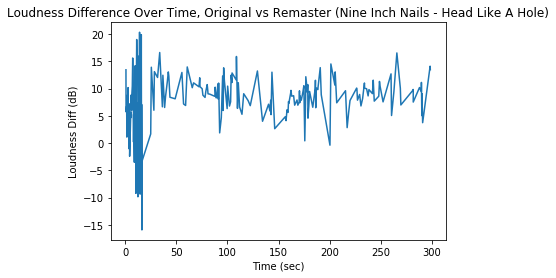

In [87]:
plt.plot(nin_df['start_rnd'], nin_df['loud_start_diff'])
plt.xlabel('Time (sec)')
plt.ylabel('Loudness Diff (dB)')
plt.title('Loudness Difference Over Time, Original vs Remaster (Nine Inch Nails - Head Like A Hole)')
plt.show()

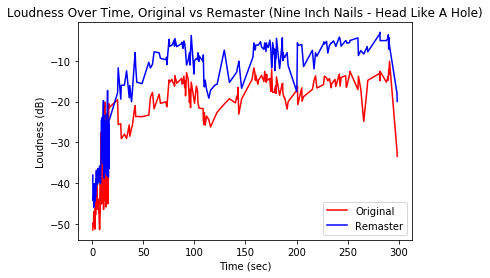

In [88]:
plt.plot(nin_df['start_rnd'], nin_df['loudness_start'], color='Red', label='Original')
plt.plot(nin_df['start_rnd'], nin_df['rem_loudness_start'], color='Blue', label='Remaster')
plt.xlabel('Time (sec)')
plt.ylabel('Loudness (dB)')
plt.title('Loudness Over Time, Original vs Remaster (Nine Inch Nails - Head Like A Hole)')
plt.legend()
plt.show()

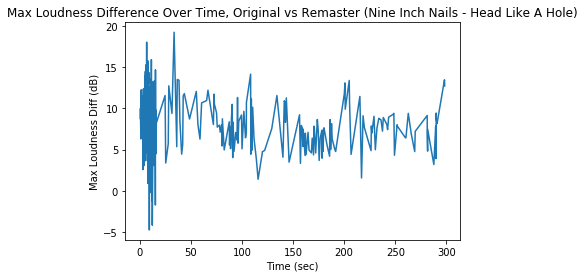

In [89]:
plt.plot(nin_df['start_rnd'], nin_df['loud_max_diff'])
plt.xlabel('Time (sec)')
plt.ylabel('Max Loudness Diff (dB)')
plt.title('Max Loudness Difference Over Time, Original vs Remaster (Nine Inch Nails - Head Like A Hole)')
plt.show()

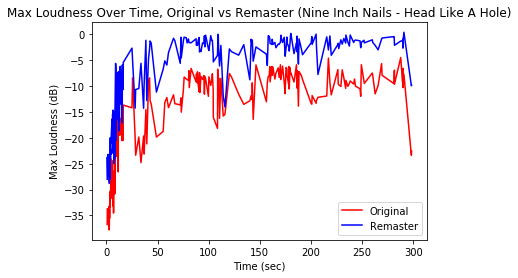

In [90]:
plt.plot(nin_df['start_rnd'], nin_df['loudness_max'], color='Red', label='Original')
plt.plot(nin_df['start_rnd'], nin_df['rem_loudness_max'], color='Blue', label='Remaster')
plt.xlabel('Time (sec)')
plt.ylabel('Max Loudness (dB)')
plt.title('Max Loudness Over Time, Original vs Remaster (Nine Inch Nails - Head Like A Hole)')
plt.legend()
plt.show()

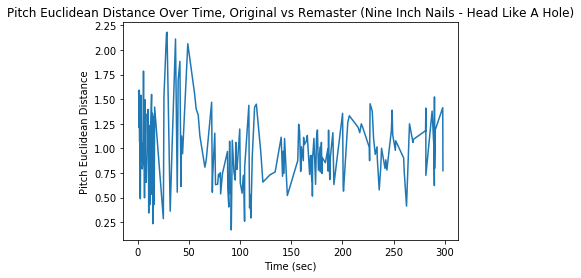

In [91]:
plt.plot(nin_df['start_rnd'], nin_df['pitch_eucl_dist'])
plt.xlabel('Time (sec)')
plt.ylabel('Pitch Euclidean Distance')
plt.title('Pitch Euclidean Distance Over Time, Original vs Remaster (Nine Inch Nails - Head Like A Hole)')
plt.show()

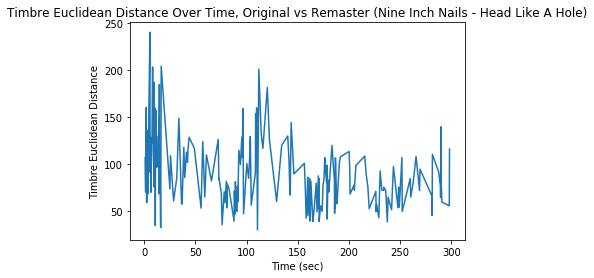

In [92]:
plt.plot(nin_df['start_rnd'], nin_df['timbre_eucl_dist'])
plt.xlabel('Time (sec)')
plt.ylabel('Timbre Euclidean Distance')
plt.title('Timbre Euclidean Distance Over Time, Original vs Remaster (Nine Inch Nails - Head Like A Hole)')
plt.show()

In [93]:
notor_big_df = pd.read_csv(clean_data_folder + 'notor_big_analysis_clean.csv')
notor_big_df = notor_big_df.drop(columns=['Unnamed: 0'])
notor_big_df['song_title'] = 'Big Poppa'
notor_big_df.head()

,start_rnd,duration_rnd,loudness_start,rem_loudness_start,loud_start_diff,loudness_max,rem_loudness_max,loud_max_diff,pitches,rem_pitches,pitch_eucl_dist,timbre,rem_timbre,timbre_eucl_dist,song_title
0,0.4,0.2,-19.317,-19.482,-0.165,-13.939,-14.923,-0.984,"[0.033, 0.065, 0.037, 0.036, 0.593, 0.577, 0.9...","[0.612, 0.364, 0.307, 0.417, 1.0, 0.493, 0.279...",1.429187,"[43.127, 65.9, -55.457, -40.077, -16.985, -26....","[41.757, 49.343, -57.733, -37.261, -9.004, -29...",22.750096,Big Poppa
1,0.8,0.4,-22.847,-25.808,-2.961,-1.772,-2.795,-1.023,"[0.803, 0.226, 0.174, 0.23, 1.0, 0.649, 0.393,...","[0.756, 0.196, 0.159, 0.219, 1.0, 0.735, 0.403...",0.116069,"[49.317, 76.487, -56.554, 118.011, -21.925, -3...","[47.792, 56.967, -67.356, 115.782, -3.183, -8....",45.281587,Big Poppa
2,1.2,0.3,-20.183,-21.900,-1.717,-10.810,-11.465,-0.655,"[0.391, 0.541, 0.879, 1.0, 0.746, 0.241, 0.174...","[0.372, 0.538, 0.936, 1.0, 0.713, 0.204, 0.167...",0.164027,"[43.703, 32.69, -7.638, 24.045, 11.985, 5.384,...","[43.483, 9.523, -12.919, 31.445, 15.884, 0.028...",30.567601,Big Poppa
3,1.5,0.3,-29.045,-28.775,0.270,-13.568,-14.478,-0.910,"[0.775, 0.347, 0.144, 0.036, 0.142, 0.112, 0.0...","[0.82, 0.383, 0.171, 0.071, 0.151, 0.129, 0.04...",0.084184,"[41.386, 5.119, -38.661, -4.499, -44.662, 2.48...","[39.037, 27.288, -16.349, -23.955, -38.166, 38...",72.399724,Big Poppa
4,4.4,0.3,-16.994,-16.751,0.243,-8.587,-9.255,-0.668,"[0.512, 0.369, 0.622, 0.396, 0.256, 0.329, 0.2...","[0.494, 0.387, 0.605, 0.442, 0.267, 0.327, 0.2...",0.073621,"[47.994, -8.977, 5.056, -9.864, -17.438, -5.82...","[47.487, -26.038, 3.427, 6.962, -7.316, -13.51...",28.987462,Big Poppa


In [94]:
notor_big_loud_mean = notor_big_df.loud_start_diff.mean()
notor_big_loud_mean

-0.39127380952381

In [95]:
notor_big_max_loud_mean = notor_big_df.loud_max_diff.mean()
notor_big_max_loud_mean

-0.7322916666666668

In [96]:
notor_big_pitch_eucl_mean = notor_big_df.pitch_eucl_dist.mean()
notor_big_pitch_eucl_mean

1.2016976551190532

In [97]:
notor_big_timbre_eucl_mean = notor_big_df.timbre_eucl_dist.mean()
notor_big_timbre_eucl_mean

134.06049165375083

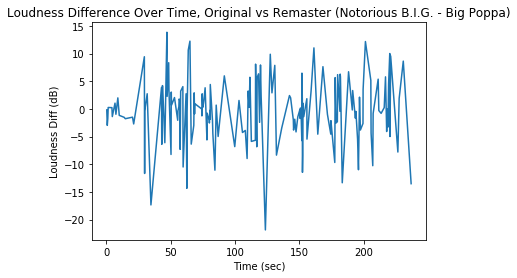

In [98]:
plt.plot(notor_big_df['start_rnd'], notor_big_df['loud_start_diff'])
plt.xlabel('Time (sec)')
plt.ylabel('Loudness Diff (dB)')
plt.title('Loudness Difference Over Time, Original vs Remaster (Notorious B.I.G. - Big Poppa)')
plt.show()

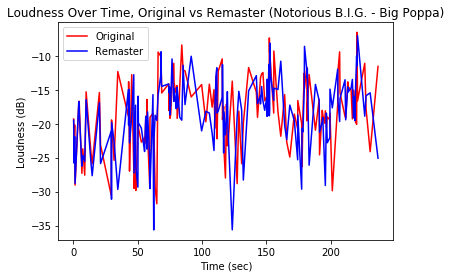

In [99]:
plt.plot(notor_big_df['start_rnd'], notor_big_df['loudness_start'], color='Red', label='Original')
plt.plot(notor_big_df['start_rnd'], notor_big_df['rem_loudness_start'], color='Blue', label='Remaster')
plt.xlabel('Time (sec)')
plt.ylabel('Loudness (dB)')
plt.title('Loudness Over Time, Original vs Remaster (Notorious B.I.G. - Big Poppa)')
plt.legend()
plt.show()

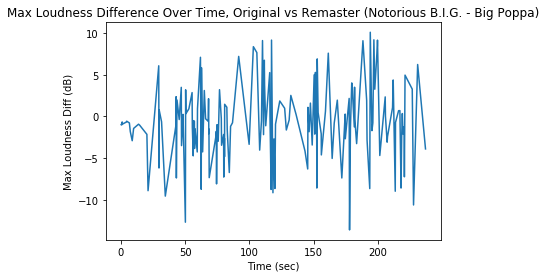

In [100]:
plt.plot(notor_big_df['start_rnd'], notor_big_df['loud_max_diff'])
plt.xlabel('Time (sec)')
plt.ylabel('Max Loudness Diff (dB)')
plt.title('Max Loudness Difference Over Time, Original vs Remaster (Notorious B.I.G. - Big Poppa)')
plt.show()

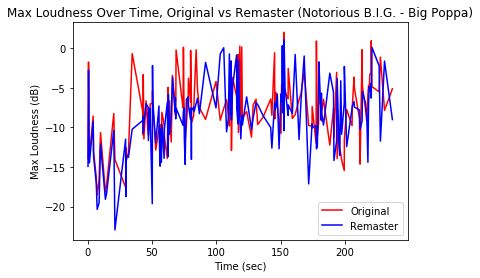

In [101]:
plt.plot(notor_big_df['start_rnd'], notor_big_df['loudness_max'], color='Red', label='Original')
plt.plot(notor_big_df['start_rnd'], notor_big_df['rem_loudness_max'], color='Blue', label='Remaster')
plt.xlabel('Time (sec)')
plt.ylabel('Max Loudness (dB)')
plt.title('Max Loudness Over Time, Original vs Remaster (Notorious B.I.G. - Big Poppa)')
plt.legend()
plt.show()

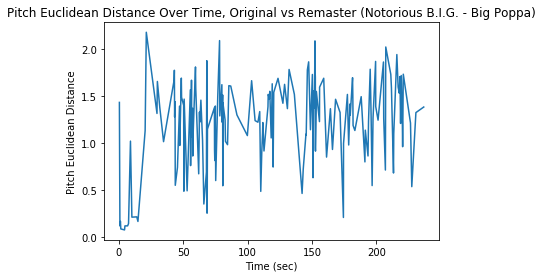

In [102]:
plt.plot(notor_big_df['start_rnd'], notor_big_df['pitch_eucl_dist'])
plt.xlabel('Time (sec)')
plt.ylabel('Pitch Euclidean Distance')
plt.title('Pitch Euclidean Distance Over Time, Original vs Remaster (Notorious B.I.G. - Big Poppa)')
plt.show()

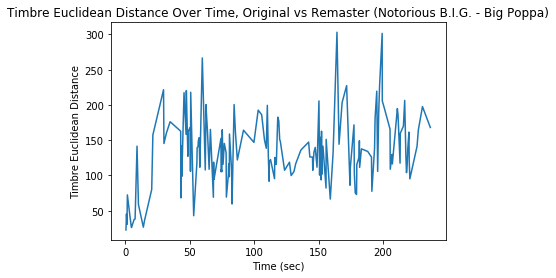

In [103]:
plt.plot(notor_big_df['start_rnd'], notor_big_df['timbre_eucl_dist'])
plt.xlabel('Time (sec)')
plt.ylabel('Timbre Euclidean Distance')
plt.title('Timbre Euclidean Distance Over Time, Original vs Remaster (Notorious B.I.G. - Big Poppa)')
plt.show()

In [104]:
queen_df = pd.read_csv(clean_data_folder + 'queen_analysis_clean.csv')
queen_df = queen_df.drop(columns=['Unnamed: 0'])
queen_df['song_title'] = 'Another One Bites The Dust'
queen_df.head()

,start_rnd,duration_rnd,loudness_start,rem_loudness_start,loud_start_diff,loudness_max,rem_loudness_max,loud_max_diff,pitches,rem_pitches,pitch_eucl_dist,timbre,rem_timbre,timbre_eucl_dist,song_title
0,0.4,0.1,-43.267,-37.984,5.283,-36.398,-30.624,5.774,"[0.353, 0.162, 0.45, 0.791, 0.432, 0.386, 0.60...","[0.351, 0.155, 0.394, 0.687, 0.461, 0.386, 0.6...",0.169856,"[22.636, -232.844, -146.453, -89.755, 54.528, ...","[27.491, -293.557, -142.252, -60.457, 31.325, ...",78.246385,Another One Bites The Dust
1,0.8,0.2,-45.709,-40.844,4.865,-33.626,-27.589,6.037,"[0.808, 1.0, 0.501, 0.749, 0.754, 0.727, 0.547...","[0.988, 1.0, 0.456, 0.651, 0.669, 0.695, 0.521...",0.233135,"[17.314, 156.056, -115.166, 113.947, 1.752, -5...","[23.127, 155.413, -111.603, 118.228, -12.956, ...",25.502402,Another One Bites The Dust
2,1.9,0.3,-47.879,-42.622,5.257,-36.937,-30.343,6.594,"[0.894, 0.9, 0.41, 0.239, 0.56, 0.407, 0.282, ...","[0.881, 1.0, 0.348, 0.232, 0.46, 0.355, 0.258,...",0.276510,"[14.936, 144.242, -92.339, 98.969, 19.792, -70...","[20.532, 136.076, -84.084, 105.887, 1.377, -82...",34.727871,Another One Bites The Dust
3,2.6,0.1,-48.701,-43.375,5.326,-34.545,-28.048,6.497,"[1.0, 0.683, 0.413, 0.383, 0.406, 0.65, 0.166,...","[1.0, 0.678, 0.427, 0.405, 0.407, 0.63, 0.158,...",0.043035,"[22.941, -224.744, -148.888, -61.664, 46.216, ...","[29.113, -248.295, -138.677, -54.641, 22.969, ...",41.591740,Another One Bites The Dust
4,2.7,0.3,-40.337,-34.415,5.922,-9.759,-3.217,6.542,"[0.818, 0.263, 0.084, 0.117, 0.478, 1.0, 0.171...","[0.928, 0.312, 0.092, 0.111, 0.446, 1.0, 0.189...",0.135573,"[35.929, 1.146, -191.381, 165.681, 5.324, 34.4...","[42.607, -5.675, -181.953, 174.252, -7.088, 2....",46.981910,Another One Bites The Dust


In [105]:
queen_loud_mean = queen_df.loud_start_diff.mean()
queen_loud_mean

7.022844444444442

In [106]:
queen_max_loud_mean = queen_df.loud_max_diff.mean()
queen_max_loud_mean

7.960177777777778

In [107]:
queen_pitch_eucl_mean = queen_df.pitch_eucl_dist.mean()
queen_pitch_eucl_mean

0.5144517368965182

In [108]:
queen_timbre_eucl_mean = queen_df.timbre_eucl_dist.mean()
queen_timbre_eucl_mean

72.49027626095425

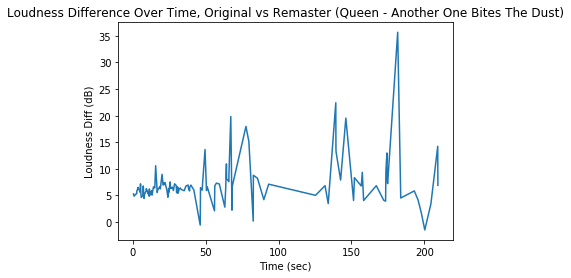

In [109]:
plt.plot(queen_df['start_rnd'], queen_df['loud_start_diff'])
plt.xlabel('Time (sec)')
plt.ylabel('Loudness Diff (dB)')
plt.title('Loudness Difference Over Time, Original vs Remaster (Queen - Another One Bites The Dust)')
plt.show()

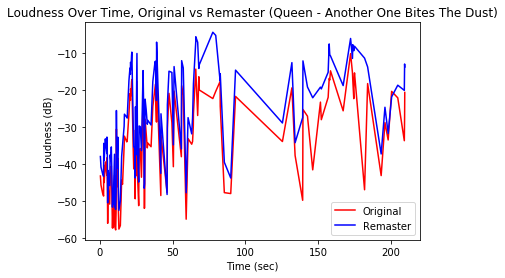

In [110]:
plt.plot(queen_df['start_rnd'], queen_df['loudness_start'], color='Red', label='Original')
plt.plot(queen_df['start_rnd'], queen_df['rem_loudness_start'], color='Blue', label='Remaster')
plt.xlabel('Time (sec)')
plt.ylabel('Loudness (dB)')
plt.title('Loudness Over Time, Original vs Remaster (Queen - Another One Bites The Dust)')
plt.legend()
plt.show()

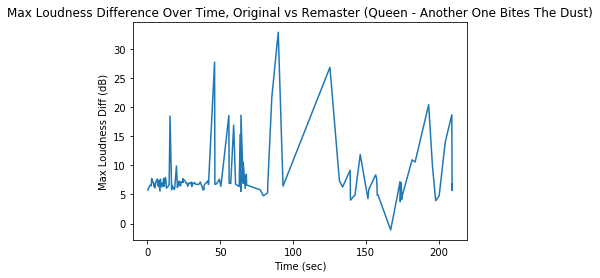

In [111]:
plt.plot(queen_df['start_rnd'], queen_df['loud_max_diff'])
plt.xlabel('Time (sec)')
plt.ylabel('Max Loudness Diff (dB)')
plt.title('Max Loudness Difference Over Time, Original vs Remaster (Queen - Another One Bites The Dust)')
plt.show()

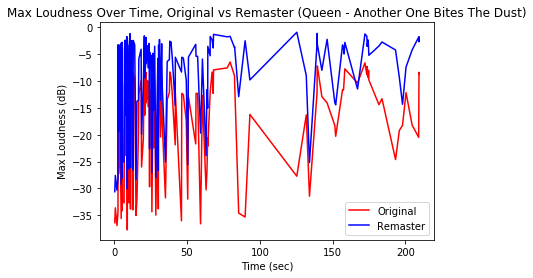

In [112]:
plt.plot(queen_df['start_rnd'], queen_df['loudness_max'], color='Red', label='Original')
plt.plot(queen_df['start_rnd'], queen_df['rem_loudness_max'], color='Blue', label='Remaster')
plt.xlabel('Time (sec)')
plt.ylabel('Max Loudness (dB)')
plt.title('Max Loudness Over Time, Original vs Remaster (Queen - Another One Bites The Dust)')
plt.legend()
plt.show()

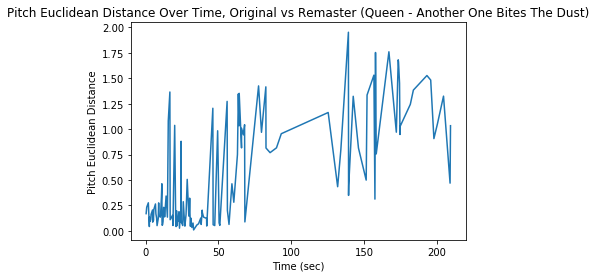

In [113]:
plt.plot(queen_df['start_rnd'], queen_df['pitch_eucl_dist'])
plt.xlabel('Time (sec)')
plt.ylabel('Pitch Euclidean Distance')
plt.title('Pitch Euclidean Distance Over Time, Original vs Remaster (Queen - Another One Bites The Dust)')
plt.show()

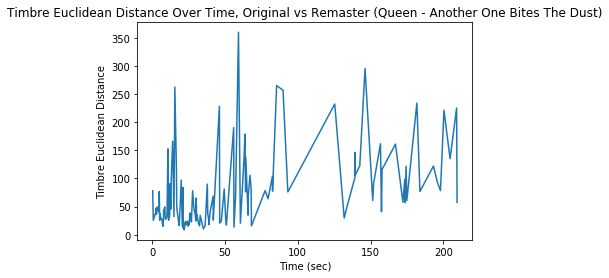

In [114]:
plt.plot(queen_df['start_rnd'], queen_df['timbre_eucl_dist'])
plt.xlabel('Time (sec)')
plt.ylabel('Timbre Euclidean Distance')
plt.title('Timbre Euclidean Distance Over Time, Original vs Remaster (Queen - Another One Bites The Dust)')
plt.show()

In [115]:
all_songs_df = pd.concat([aretha_df, beastie_df, clash_df, euryth_df, ice_cube_df, interpol_df, mb20_df, nin_df, notor_big_df, queen_df])

In [143]:
all_songs_df.head()

,start_rnd,duration_rnd,loudness_start,rem_loudness_start,loud_start_diff,loudness_max,rem_loudness_max,loud_max_diff,pitches,rem_pitches,pitch_eucl_dist,timbre,rem_timbre,timbre_eucl_dist,song_title
0,1.1,0.2,-10.277,-10.980,-0.703,-3.296,-7.765,-4.469,"[1.0, 0.372, 0.21, 0.083, 0.179, 0.099, 0.15, ...","[0.592, 0.168, 0.202, 0.329, 1.0, 0.24, 0.119,...",1.043580,"[54.154, 81.213, 36.362, 4.029, -7.159, -13.59...","[51.401, 118.269, 31.017, -33.129, 14.272, -35...",72.449235,Respect
1,11.8,0.3,-30.230,-19.958,10.272,-3.787,-4.466,-0.679,"[0.18, 0.073, 0.055, 0.038, 0.182, 0.093, 0.10...","[1.0, 0.47, 0.22, 0.159, 0.122, 0.109, 0.075, ...",1.485826,"[48.054, 43.87, -59.926, 107.773, -19.904, -12...","[52.771, 80.377, 46.676, 2.36, -33.527, 13.814...",176.769274,Respect
2,16.9,0.2,-8.496,-11.252,-2.756,-3.743,-5.642,-1.899,"[0.651, 0.602, 1.0, 0.326, 0.095, 0.166, 0.204...","[0.357, 0.48, 0.377, 0.19, 0.355, 1.0, 0.446, ...",1.184731,"[51.667, 56.651, 52.495, 78.093, 13.981, 13.52...","[50.298, 63.888, -8.144, 50.348, -28.977, 1.07...",105.260583,Respect
3,26.5,0.4,-23.003,-16.909,6.094,-2.039,-3.838,-1.799,"[1.0, 0.159, 0.058, 0.024, 0.063, 0.059, 0.055...","[0.228, 0.442, 0.69, 0.345, 0.315, 0.319, 0.44...",1.572021,"[46.197, 57.776, 2.359, -14.944, 31.355, 61.60...","[51.455, 70.437, 31.236, -12.336, 11.77, 17.15...",98.092696,Respect
4,35.3,0.2,-22.807,-10.488,12.319,-19.153,-5.100,14.053,"[0.589, 0.572, 0.501, 0.667, 1.0, 0.483, 0.123...","[0.115, 0.175, 0.227, 0.177, 0.048, 0.059, 0.2...",1.557303,"[39.551, -5.897, -15.692, -36.998, -0.268, -25...","[52.733, 67.814, 38.196, 21.107, -10.057, -11....",121.127687,Respect


In [116]:
all_songs_group = all_songs_df.groupby('song_title').mean()
all_songs_group = all_songs_group.reset_index()
all_songs_group = all_songs_group[['song_title', 'loud_start_diff', 'loud_max_diff', 'pitch_eucl_dist', 'timbre_eucl_dist']]
all_songs_group

,song_title,loud_start_diff,loud_max_diff,pitch_eucl_dist,timbre_eucl_dist
0,Another One Bites The Dust,7.022844,7.960178,0.514452,72.490276
1,Big Poppa,-0.391274,-0.732292,1.201698,134.060492
2,Ch-Check It Out,-0.218265,1.248513,1.218316,128.936421
3,Head Like A Hole,8.113251,7.935740,0.977739,92.331330
4,It Was A Good Day,2.435591,2.256182,1.341625,142.210861
5,London Calling,-0.031173,-0.316113,1.244102,88.152800
6,PDA,0.121783,0.103514,0.073034,7.033960
7,Respect,2.590089,0.268022,1.292507,116.003966
8,Sweet Dreams (Are Made of This),-6.366063,-5.688825,1.087196,103.114126
9,Unwell,-0.163814,-0.082614,1.036645,93.796679


all_songs_group.to_csv("audio_analysis_averages.csv")

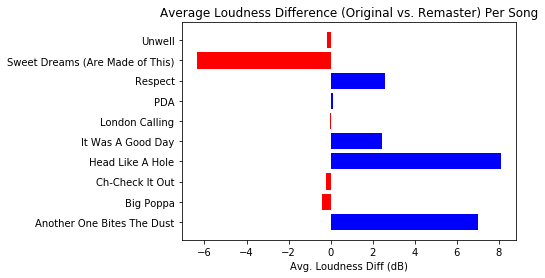

In [117]:
colors = []
for diff in all_songs_group['loud_start_diff']:
    if diff < 0:
        colors.append('red')
    else:
        colors.append('blue')
plt.barh(all_songs_group['song_title'], all_songs_group['loud_start_diff'], color=colors)
plt.xlabel('Avg. Loudness Diff (dB)')
plt.title('Average Loudness Difference (Original vs. Remaster) Per Song')
plt.show()

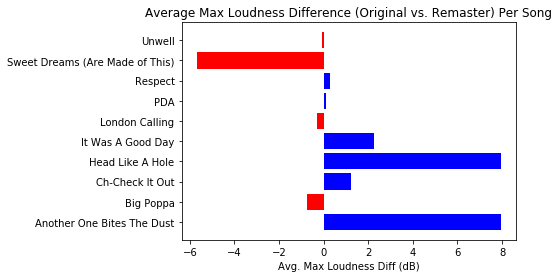

In [118]:
colors = []
for diff in all_songs_group['loud_max_diff']:
    if diff < 0:
        colors.append('red')
    else:
        colors.append('blue')
plt.barh(all_songs_group['song_title'], all_songs_group['loud_max_diff'], color=colors)
plt.xlabel('Avg. Max Loudness Diff (dB)')
plt.title('Average Max Loudness Difference (Original vs. Remaster) Per Song')
plt.show()

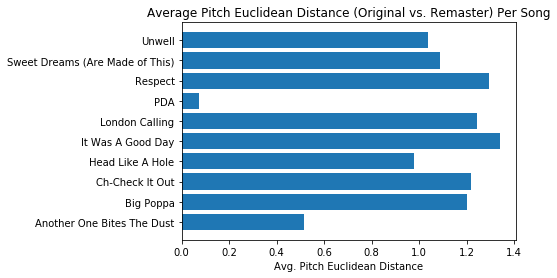

In [119]:
plt.barh(all_songs_group['song_title'], all_songs_group['pitch_eucl_dist'])
plt.xlabel('Avg. Pitch Euclidean Distance')
plt.title('Average Pitch Euclidean Distance (Original vs. Remaster) Per Song')
plt.show()

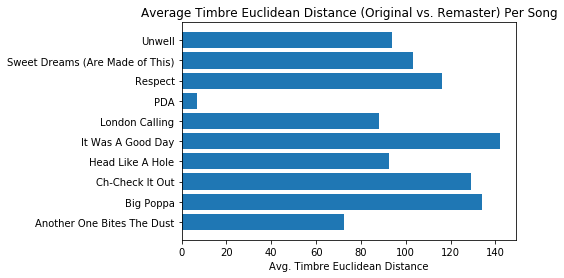

In [120]:
plt.barh(all_songs_group['song_title'], all_songs_group['timbre_eucl_dist'])
plt.xlabel('Avg. Timbre Euclidean Distance')
plt.title('Average Timbre Euclidean Distance (Original vs. Remaster) Per Song')
plt.show()

In [121]:
audio_features_df = pd.read_csv(clean_data_folder + 'audio_features_clean.csv')
audio_features_df = audio_features_df.drop(columns=['Unnamed: 0'])
audio_features_df.head()

,spotify_id,artist_id,artist,song_title,remaster,tempo,time_signature,key,mode,loudness,energy,danceability,acousticness,instrumentalness,liveness,speechiness,valence,genres
0,291RmMazWAmDitFuD6NJCv,1dfeR4HaWDbWqFHLkxsg1d,Queen,Another One Bites The Dust,N,109.884,4,F,0,-13.159,0.366,0.926,0.0483,0.136,0.1190,0.122,0.784,"['glam rock', 'rock']"
1,57JVGBtBLCfHw2muk5416J,1dfeR4HaWDbWqFHLkxsg1d,Queen,Another One Bites The Dust - Remastered 2011,Y,109.975,4,F,0,-6.472,0.528,0.933,0.1120,0.329,0.1630,0.162,0.756,"['glam rock', 'rock']"
2,5QKN4oxf5BB94Tsu1TO79X,5me0Irg2ANcsgc93uaYrpb,The Notorious B.I.G.,Big Poppa - 2005 Remaster,N,84.662,4,A,0,-6.104,0.620,0.748,0.3010,0.000,0.0717,0.285,0.766,"['east coast hip hop', 'gangster rap', 'hardco..."
3,3moMtpCsPJvXirsyRwsD6u,5me0Irg2ANcsgc93uaYrpb,The Notorious B.I.G.,Big Poppa - 2005 Remaster,Y,84.487,4,A,0,-7.220,0.578,0.778,0.4320,0.000,0.1380,0.274,0.758,"['east coast hip hop', 'gangster rap', 'hardco..."
4,56H98l4uinRifnTH8e308N,03r4iKL2g2442PT9n2UKsx,Beastie Boys,Ch-Check It Out,N,115.062,4,C♯/D♭,1,-7.020,0.899,0.795,0.0766,0.000,0.0852,0.292,0.694,"['alternative rock', 'east coast hip hop', 'hi..."


In [122]:
audio_feat_og = audio_features_df[audio_features_df['remaster'] == 'N']
audio_feat_og = audio_feat_og.drop(columns=['remaster', 'spotify_id', 'time_signature', 'key', 'mode', 'acousticness', 'instrumentalness', 'liveness', 'speechiness'])
audio_feat_og.columns = ['og_' + str(col) for col in audio_feat_og.columns]
audio_feat_og = audio_feat_og.rename(columns={'og_artist_id' : 'artist_id', 'og_artist' : 'artist', 'og_song_title' : 'song_title', 'og_genres' : 'genres'})
audio_feat_og.head()

,artist_id,artist,song_title,og_tempo,og_loudness,og_energy,og_danceability,og_valence,genres
0,1dfeR4HaWDbWqFHLkxsg1d,Queen,Another One Bites The Dust,109.884,-13.159,0.366,0.926,0.784,"['glam rock', 'rock']"
2,5me0Irg2ANcsgc93uaYrpb,The Notorious B.I.G.,Big Poppa - 2005 Remaster,84.662,-6.104,0.620,0.748,0.766,"['east coast hip hop', 'gangster rap', 'hardco..."
4,03r4iKL2g2442PT9n2UKsx,Beastie Boys,Ch-Check It Out,115.062,-7.020,0.899,0.795,0.694,"['alternative rock', 'east coast hip hop', 'hi..."
6,0X380XXQSNBYuleKzav5UO,Nine Inch Nails,Head Like A Hole,115.386,-11.255,0.792,0.663,0.443,"['alternative metal', 'alternative rock', 'cyb..."
8,3Mcii5XWf6E0lrY3Uky4cA,Ice Cube,It Was A Good Day,82.299,-7.428,0.648,0.809,0.755,"['conscious hip hop', 'g funk', 'gangster rap'..."


In [123]:
audio_feat_rem = audio_features_df[audio_features_df['remaster'] == 'Y']
audio_feat_rem = audio_feat_rem.drop(columns=['artist', 'song_title', 'remaster', 'genres', 'spotify_id', 'time_signature', 'key', 'mode', 'acousticness', 'instrumentalness', 'liveness', 'speechiness'])
audio_feat_rem.columns = ['rem_' + str(col) for col in audio_feat_rem.columns]
audio_feat_rem = audio_feat_rem.rename(columns={'rem_artist_id' : 'artist_id'})
audio_feat_rem.head()

,artist_id,rem_tempo,rem_loudness,rem_energy,rem_danceability,rem_valence
1,1dfeR4HaWDbWqFHLkxsg1d,109.975,-6.472,0.528,0.933,0.756
3,5me0Irg2ANcsgc93uaYrpb,84.487,-7.220,0.578,0.778,0.758
5,03r4iKL2g2442PT9n2UKsx,115.055,-6.353,0.912,0.795,0.723
7,0X380XXQSNBYuleKzav5UO,115.408,-4.012,0.912,0.649,0.402
9,3Mcii5XWf6E0lrY3Uky4cA,82.356,-5.328,0.744,0.798,0.794


In [138]:
audio_feat_mrge = pd.merge(audio_feat_og, audio_feat_rem, on='artist_id')
audio_feat_mrge['song_title_2'] = ['Big Poppa' if x == 'Big Poppa - 2005 Remaster' else 'Sweet Dreams (Are Made of This)' if x == 'Sweet Dreams (Are Made of This) - Remastered' else x for x in audio_feat_mrge['song_title']]
audio_feat_mrge['tempo_diff'] = audio_feat_mrge['rem_tempo'] - audio_feat_mrge['og_tempo']
audio_feat_mrge['loud_diff'] = audio_feat_mrge['rem_loudness'] - audio_feat_mrge['og_loudness']
audio_feat_mrge['energy_diff'] = audio_feat_mrge['rem_energy'] - audio_feat_mrge['og_energy']
audio_feat_mrge['dance_diff'] = audio_feat_mrge['rem_danceability'] - audio_feat_mrge['og_danceability']
audio_feat_mrge['valence_diff'] = audio_feat_mrge['rem_valence'] - audio_feat_mrge['og_valence']
audio_feat_mrge = audio_feat_mrge[['artist_id', 'artist', 'song_title_2', 'genres', 'tempo_diff', 'loud_diff', 'energy_diff','dance_diff','valence_diff']]
audio_feat_mrge = audio_feat_mrge.rename(columns={'song_title_2' : 'song_title'})
audio_feat_mrge

,artist_id,artist,song_title,genres,tempo_diff,loud_diff,energy_diff,dance_diff,valence_diff
0,1dfeR4HaWDbWqFHLkxsg1d,Queen,Another One Bites The Dust,"['glam rock', 'rock']",0.091,6.687,0.162,0.007,-0.028
1,5me0Irg2ANcsgc93uaYrpb,The Notorious B.I.G.,Big Poppa,"['east coast hip hop', 'gangster rap', 'hardco...",-0.175,-1.116,-0.042,0.030,-0.008
2,03r4iKL2g2442PT9n2UKsx,Beastie Boys,Ch-Check It Out,"['alternative rock', 'east coast hip hop', 'hi...",-0.007,0.667,0.013,0.000,0.029
3,0X380XXQSNBYuleKzav5UO,Nine Inch Nails,Head Like A Hole,"['alternative metal', 'alternative rock', 'cyb...",0.022,7.243,0.120,-0.014,-0.041
4,3Mcii5XWf6E0lrY3Uky4cA,Ice Cube,It Was A Good Day,"['conscious hip hop', 'g funk', 'gangster rap'...",0.057,2.100,0.096,-0.011,0.039
5,3RGLhK1IP9jnYFH4BRFJBS,The Clash,London Calling,"['classic rock', 'dance rock', 'permanent wave...",0.032,-0.420,0.002,-0.003,0.021
6,3WaJSfKnzc65VDgmj2zU8B,Interpol,PDA,"['alternative dance', 'alternative rock', 'dan...",-0.232,0.137,-0.009,0.001,-0.027
7,7nwUJBm0HE4ZxD3f5cy5ok,Aretha Franklin,Respect,"['adult standards', 'classic soul', 'jazz blue...",0.041,-1.160,0.054,-0.061,-0.004
8,0NKDgy9j66h3DLnN8qu1bB,Eurythmics,Sweet Dreams (Are Made of This),"['dance pop', 'dance rock', 'europop', 'mellow...",0.054,-6.790,-0.211,0.022,-0.009
9,3Ngh2zDBRPEriyxQDAMKd1,Matchbox Twenty,Unwell,"['neo mellow', 'pop rock', 'post-grunge']",0.267,0.111,0.005,0.186,0.008


audio_feat_mrge.to_csv("audio_features_averages.csv")

[]

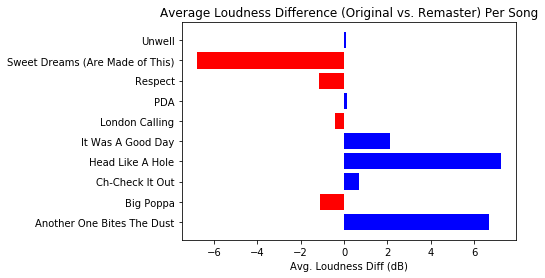

In [126]:
colors = []
for diff in audio_feat_mrge['loud_diff']:
    if diff < 0:
        colors.append('red')
    else:
        colors.append('blue')
plt.barh(audio_feat_mrge['song_title'], audio_feat_mrge['loud_diff'], color=colors)
plt.xlabel('Avg. Loudness Diff (dB)')
plt.title('Average Loudness Difference (Original vs. Remaster) Per Song')
plt.plot()

[]

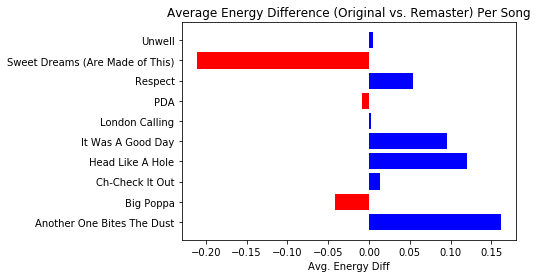

In [127]:
colors = []
for diff in audio_feat_mrge['energy_diff']:
    if diff < 0:
        colors.append('red')
    else:
        colors.append('blue')
plt.barh(audio_feat_mrge['song_title'], audio_feat_mrge['energy_diff'], color=colors)
plt.xlabel('Avg. Energy Diff')
plt.title('Average Energy Difference (Original vs. Remaster) Per Song')
plt.plot()

[]

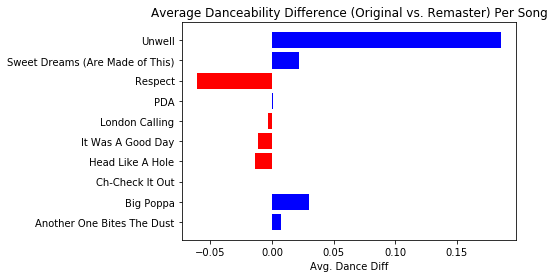

In [128]:
colors = []
for diff in audio_feat_mrge['dance_diff']:
    if diff < 0:
        colors.append('red')
    else:
        colors.append('blue')
plt.barh(audio_feat_mrge['song_title'], audio_feat_mrge['dance_diff'], color=colors)
plt.xlabel('Avg. Dance Diff')
plt.title('Average Danceability Difference (Original vs. Remaster) Per Song')
plt.plot()

[]

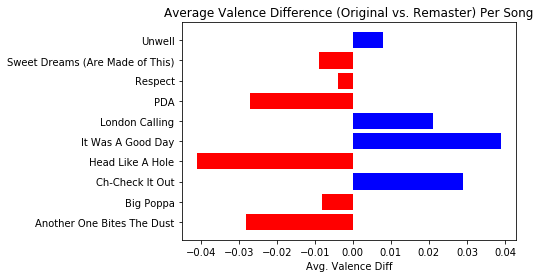

In [129]:
colors = []
for diff in audio_feat_mrge['valence_diff']:
    if diff < 0:
        colors.append('red')
    else:
        colors.append('blue')
plt.barh(audio_feat_mrge['song_title'], audio_feat_mrge['valence_diff'], color=colors)
plt.xlabel('Avg. Valence Diff')
plt.title('Average Valence Difference (Original vs. Remaster) Per Song')
plt.plot()